In [1]:
import os
import numpy as np
import pandas as pd
from operator import itemgetter
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

In [ ]:
def label_func(file):
    status = file.split('-')[1][0]
    code = file[-8:-4]
    if code.count('0') == 4:
        syn = 0
    else:
        count = (
            (1, code.count('1')),
            (2, code.count('2')),
            (3, code.count('3')),
            (4, code.count('4')),
            (5, code.count('5'))
        )
        syn = max(count, key=itemgetter(1))[0]
    code = status + str(syn)
    covid = ['33', '03', '30', '23', '31', '32', '34']
    other = ['15', '05', '10', '25', '21', '22', '24', '01', '02', '04', '20']
    if code in covid:
        return True
    elif code in other:            
        return False

In [24]:
path = '../../../data/balanced'
covid, other = [], []
counter = 0
frequency = 10
for el in os.listdir(path):
    if label_func(el):
        covid.append(1)
    else:
        counter += 1
        if counter % frequency == 0:
            other.append(1)
        else:
            os.remove(os.path.join(path, el))

In [25]:
len(covid), len(other)

(1931, 2350)

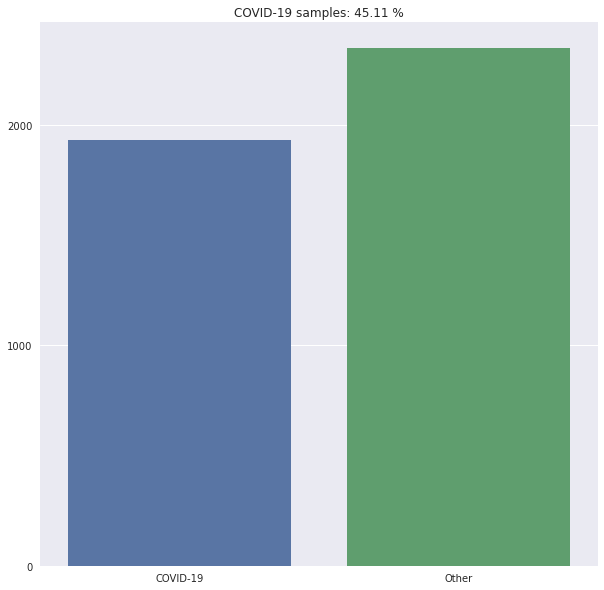

In [26]:
plt.figure(figsize=(10,10))
plt.yticks([i for i in range(len(other)) if i % 1000 == 0])
sns.barplot(x=['COVID-19', 'Other'], y=[len(covid), len(other)])
plt.title(f'COVID-19 samples: {100*len(covid)/(len(other)+len(covid)):.2f} %')
plt.show()